In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ACTIVIDAD PRÁCTICA 1

In [29]:
archivo = "heart.csv"  
datos = pd.read_csv(archivo)

print(datos.head()) 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


En mi opinón, las variables más interesantes son:

- cp (Tipo de dolor en el pecho): Es una de las variables más predictivas en la detección de enfermedades cardíacas.

- thalach (Máxima frecuencia cardíaca alcanzada): Indicador clave de esfuerzo físico y salud cardiovascular.

- exang (Angina inducida por ejercicio): Muestra la reacción del corazón al estrés físico.

- oldpeak y slope: Reflejan el comportamiento del segmento ST, importante para evaluar el riesgo cardiovascular.

- ca y thal: Indicadores específicos relacionados con el flujo sanguíneo y la talasemia.

Las mismas podrían servir para predecir la presencia de enfermedad cardíaca.


In [7]:
var_int = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] # variables potencialmente interesantes
datos_reducido = datos[var_int]
print(datos_reducido.head())

   cp  thalach  exang  oldpeak  slope  ca  thal
0   0      168      0      1.0      2   2     3
1   0      155      1      3.1      0   0     3
2   0      125      1      2.6      0   0     3
3   0      161      0      0.0      2   1     3
4   0      106      0      1.9      1   3     2


In [10]:
archivo_2 = "day.csv"  
datos_2 = pd.read_csv(archivo_2)

print(datos_2.head()) 

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Variables clave para predecir tendencias temporales:

- season (Temporada): Determina patrones estacionales y cómo el clima cambia durante el año.
- yr (Año): Ayuda a capturar la tendencia a largo plazo (por ejemplo, si las condiciones han mejorado o empeorado con el tiempo).
- mnth (Mes): Puede mostrar patrones mensuales en la evolución de las condiciones climáticas.
- weekday (Día de la semana): Para identificar posibles diferencias en las tendencias según el día (por ejemplo, más o menos viento durante los fines de semana).
- holiday (Día feriado): Determina si los feriados tienen algún impacto en las tendencias observadas.
- temp (Temperatura), atemp (Sensación térmica), hum (Humedad) y windspeed (Velocidad del viento): Estas variables ayudan a analizar cómo las condiciones climáticas afectan las tendencias temporales.
- workingday (Día laboral): Diferencia entre días laborales y no laborales, lo que puede influir en el comportamiento y las tendencias observadas.

In [13]:
var_int_2 = ['season', 'yr', 'mnth', 'weekday', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'workingday']
datos_reducido_2 = datos_2[var_int_2]

# Mostrar las primeras filas del dataset reducido
print(datos_reducido_2.head())

   season  yr  mnth  weekday  holiday      temp     atemp       hum  \
0       1   0     1        6        0  0.344167  0.363625  0.805833   
1       1   0     1        0        0  0.363478  0.353739  0.696087   
2       1   0     1        1        0  0.196364  0.189405  0.437273   
3       1   0     1        2        0  0.200000  0.212122  0.590435   
4       1   0     1        3        0  0.226957  0.229270  0.436957   

   windspeed  workingday  
0   0.160446           0  
1   0.248539           0  
2   0.248309           1  
3   0.160296           1  
4   0.186900           1  


In [56]:
archivo_3 = "annual_conc_by_monitor_2024.csv" 
datos_3 = pd.read_csv(archivo_3, delimiter=",")

print(datos_3.head()) 

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           88101    3  30.497478   

   Longitude  Datum            Parameter Name          Sample Duration  ...  \
0 -87.880258  NAD83                     Ozone                   1 HOUR  ...   
1 -87.880258  NAD83                     Ozone  8-HR RUN AVG BEGIN HOUR  ...   
2 -87.880258  NAD83                     Ozone  8-HR RUN AVG BEGIN HOUR  ...   
3 -87.880258  NAD83                     Ozone  8-HR RUN AVG BEGIN HOUR  ...   
4 -87.880258  NAD83  PM2.5 - Local Conditions                   1 HOUR  ...   

  75th Percentile 50th Percentile 10th Percentile    Local Site Name  \
0           0.053   

En este caso querría predecir las concentraciones futuras de ciertos contaminantes (por ejemplo, dióxido de nitrógeno, partículas PM2.5, etc.)

Variables a utilizar:

- Parameter Name (Nombre del parámetro)
- Latitude y Longitude (si quieres incluir un componente geoespacial)
- 75th Percentile, 50th Percentile, 10th Percentile (para entender las concentraciones generales)
- Date of Last Change (como indicador temporal para el modelo)

In [59]:
var_int_3 = ['Parameter Name', '75th Percentile', '50th Percentile', '10th Percentile', 'Date of Last Change']
datos_reducido_3 = datos_3[var_int_3]

# Mostrar las primeras filas del dataset reducido
print(datos_reducido_3.head())

             Parameter Name  75th Percentile  50th Percentile  \
0                     Ozone            0.053            0.046   
1                     Ozone            0.047            0.040   
2                     Ozone            0.047            0.040   
3                     Ozone            0.047            0.040   
4  PM2.5 - Local Conditions            8.900            5.600   

   10th Percentile Date of Last Change  
0            0.030          2024-10-31  
1            0.025          2024-10-31  
2            0.025          2024-10-31  
3            0.026          2024-10-31  
4            0.700          2024-10-31  


# ACTIVIDAD PRÁCTICA 2

### ----- Gráficos con Matplotlib -----

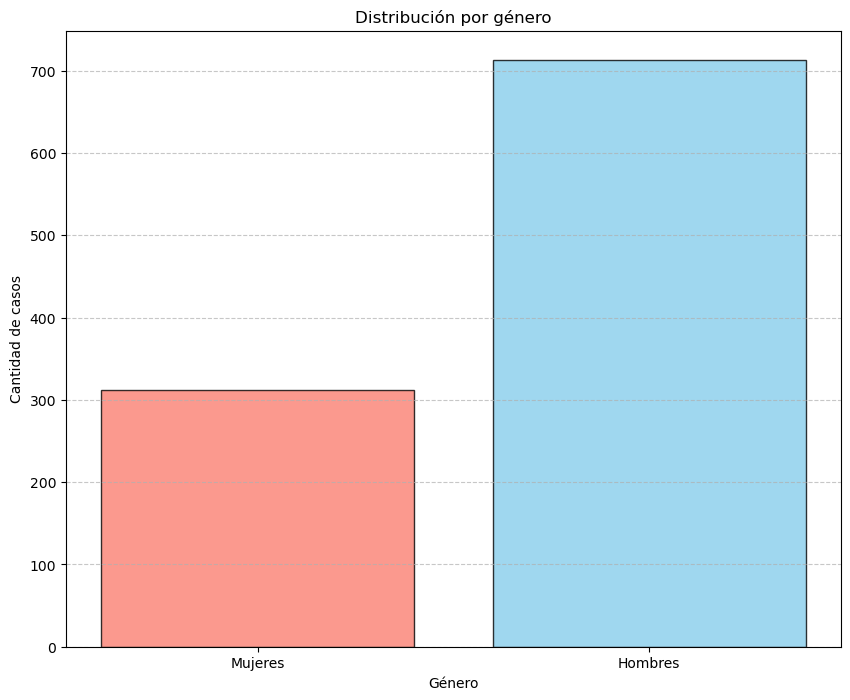

In [31]:
plt.figure(figsize=(10, 8))
genero_counts = datos['sex'].value_counts()
plt.bar(genero_counts.index, genero_counts.values, color=['skyblue', 'salmon'], alpha=0.8, edgecolor='black')
plt.xticks([0, 1], ['Mujeres', 'Hombres'])
plt.title('Distribución por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de casos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Insight: ¿Cómo cambia la frecuencia cardíaca máxima en función de la edad?

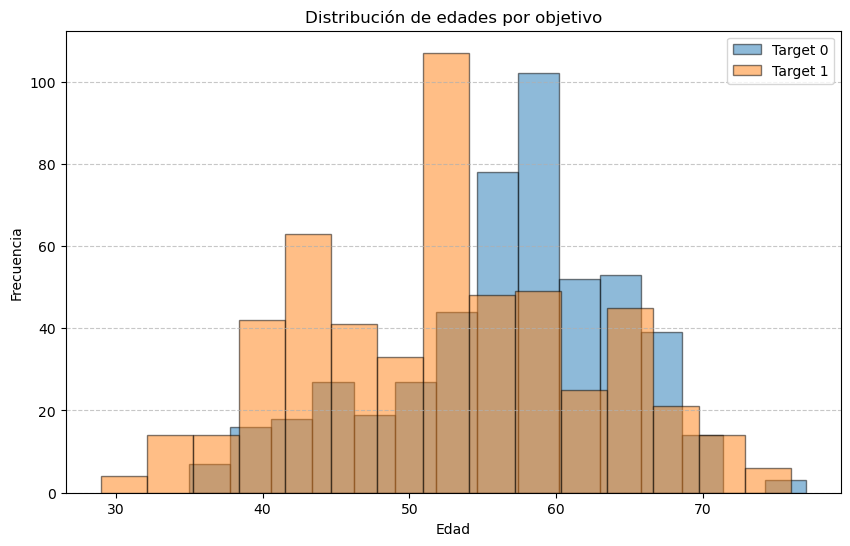

In [35]:
# 2. Histograma: distribución de edades, con separaciones por objetivo (target)
plt.figure(figsize=(10, 6))
for target in datos['target'].unique():
    subset = datos[datos['target'] == target]
    plt.hist(subset['age'], bins=15, alpha=0.5, label=f'Target {target}', edgecolor='black')
plt.title('Distribución de edades por objetivo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight: ¿Las edades de los pacientes con enfermedades cardíacas se concentran en un rango específico?

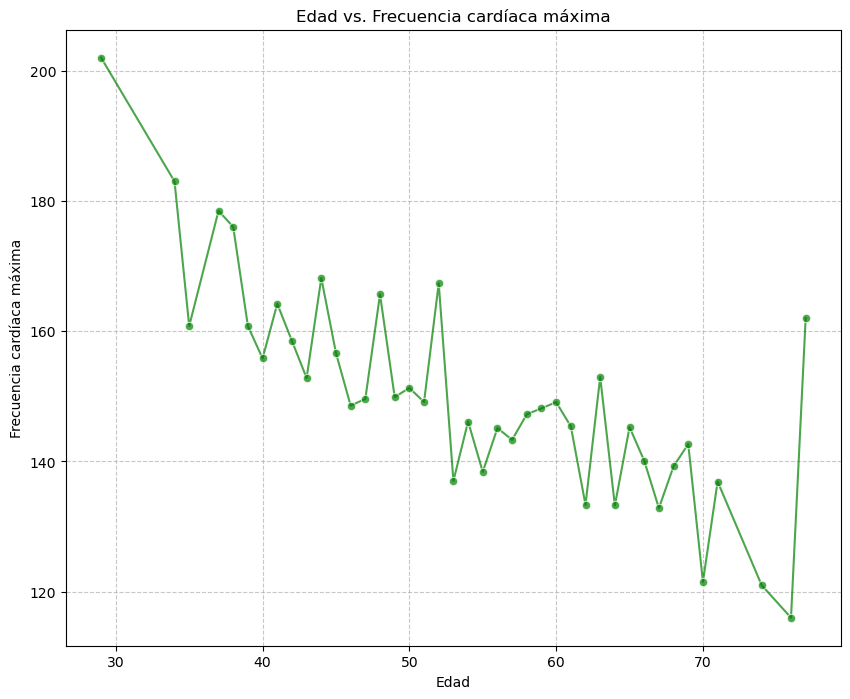

In [38]:
#Gráfico de líneas: edad vs. Ffrecuencia cardíaca máxima
plt.figure(figsize=(10, 8))
sns.lineplot(data=datos, x='age', y='thalach', errorbar=None, color='green', marker='o', alpha=0.7)
plt.title('Edad vs. Frecuencia cardíaca máxima')
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca máxima')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Insight: ¿Cómo cambia la frecuencia cardíaca máxima en función de la edad?

### ----- Gráficos con Seaborn -----

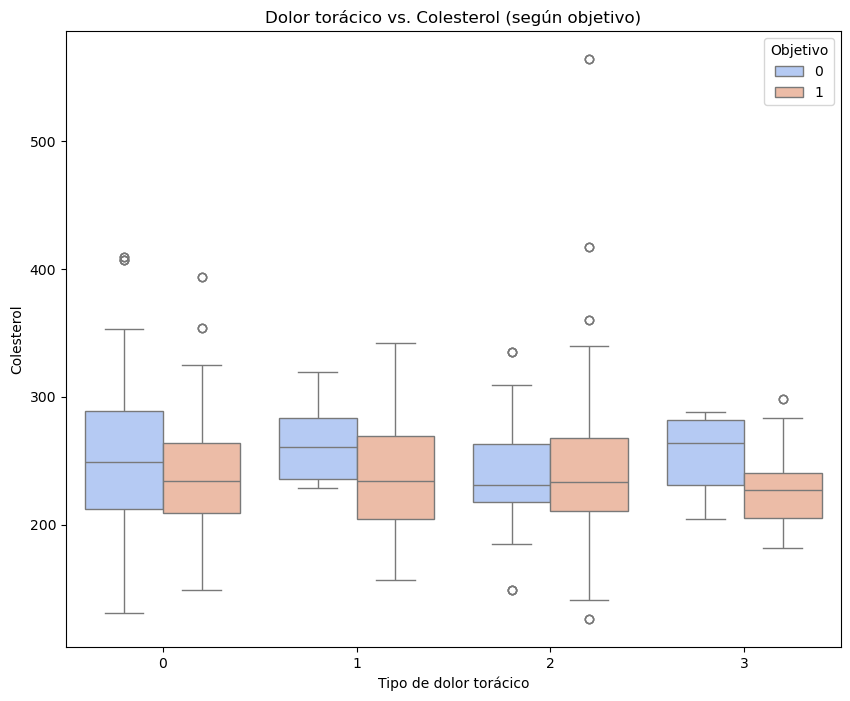

In [43]:
# 1. Boxplot: Dolor torácico (cp) vs. Colesterol (chol), con hue por objetivo
plt.figure(figsize=(10, 8))
sns.boxplot(x='cp', y='chol', hue='target', data=datos, palette='coolwarm')
plt.title('Dolor torácico vs. Colesterol (según objetivo)')
plt.xlabel('Tipo de dolor torácico')
plt.ylabel('Colesterol')
plt.legend(title='Objetivo')
plt.show()

Insight: ¿El colesterol se distribuye de manera diferente según el tipo de dolor torácico?

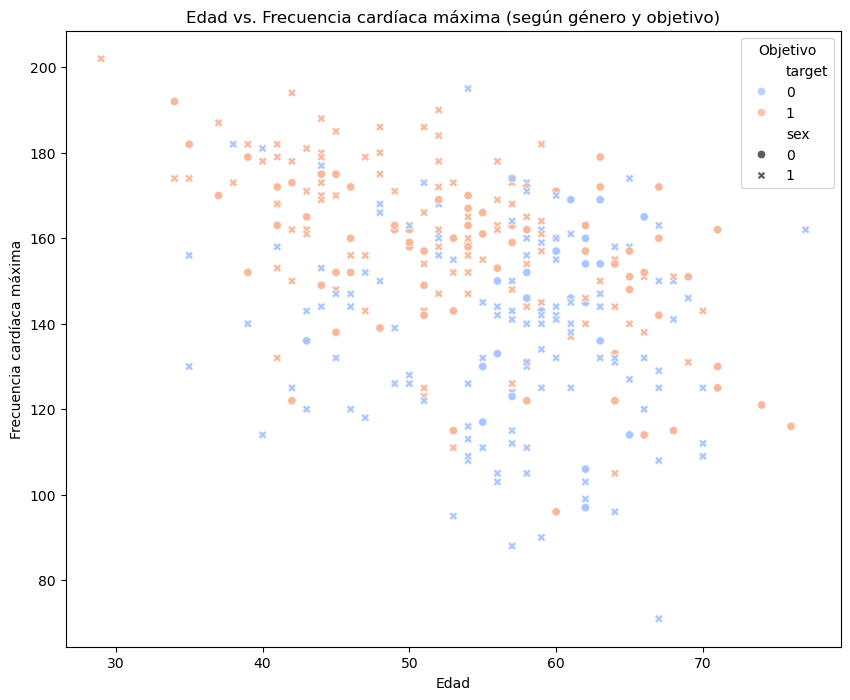

In [46]:
# 2. Scatterplot: Edad vs. Frecuencia cardíaca máxima, con hue por objetivo
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='thalach', hue='target', style='sex', palette='coolwarm', data=datos, alpha=0.8)
plt.title('Edad vs. Frecuencia cardíaca máxima (según género y objetivo)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca máxima')
plt.legend(title='Objetivo')
plt.show()

Insight: ¿Cómo se agrupan los casos según edad y frecuencia cardíaca máxima?

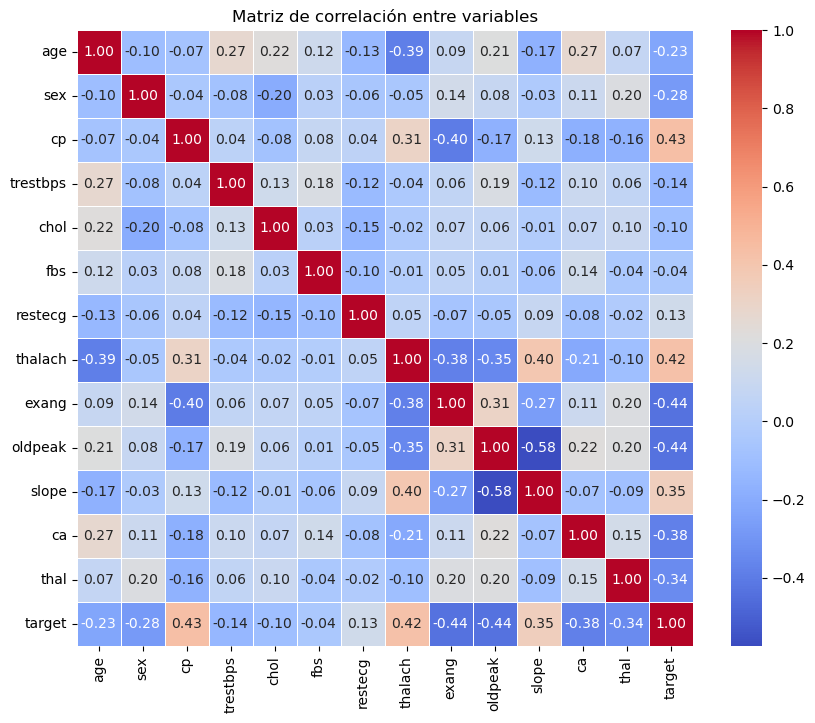

In [49]:
#3. Heatmap: Matriz de correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlacion = datos.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Matriz de correlación entre variables')
plt.show()

Insight: ¿Qué variables están más relacionadas entre sí? ¿Hay correlaciones fuertes que puedan ser útiles?